In [2]:
import tensorflow as tf
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
tf.__version__

'2.1.0'

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

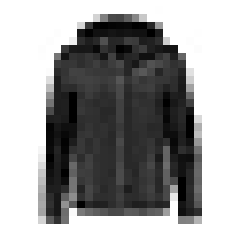

In [11]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train[0]]

'Coat'

In [15]:
X_valid.shape

(5000, 28, 28)

In [16]:
X_test.shape

(10000, 28, 28)

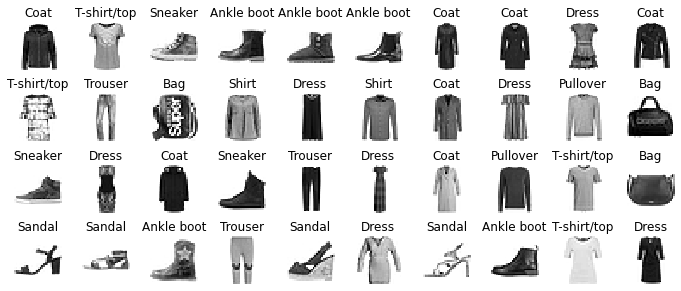

In [17]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [19]:

keras.backend.clear_session()
np.random.seed(42)



In [20]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
                                 ])

In [21]:
model.layers

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [24]:

hidden1 = model.layers[1]
hidden1.name

'dense'

In [196]:
model.get_layer(hidden1.name) is hidden1

False

In [26]:
weights, biases = hidden1.get_weights()

In [27]:
weights

array([[ 0.04761523, -0.04378312,  0.05443464, ..., -0.03473765,
        -0.00568617, -0.02314848],
       [ 0.06409226,  0.02988525, -0.05909912, ...,  0.04614927,
        -0.06107374,  0.01385733],
       [-0.04226265, -0.01378877,  0.07256256, ...,  0.01289317,
         0.02494103,  0.05178753],
       ...,
       [-0.05351594, -0.06084479, -0.05416039, ...,  0.06325042,
        -0.0197196 ,  0.01592185],
       [ 0.05577984, -0.05088056, -0.05254332, ...,  0.01041813,
         0.01351848, -0.03145259],
       [ 0.01407778,  0.04963965,  0.05097377, ..., -0.02795619,
         0.02452473,  0.06426482]], dtype=float32)

In [28]:
weights.shape

(784, 300)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
biases.shape

(300,)

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [32]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 103us/sample - loss: 0.7074 - accuracy: 0.7690 - val_loss: 0.5720 - val_accuracy: 0.7930
Epoch 2/30
55000/55000 [==============================] - 5s 92us/sample - loss: 0.4848 - accuracy: 0.8309 - val_loss: 0.4425 - val_accuracy: 0.8514
Epoch 3/30
55000/55000 [==============================] - 5s 94us/sample - loss: 0.4404 - accuracy: 0.8449 - val_loss: 0.4445 - val_accuracy: 0.8494
Epoch 4/30
55000/55000 [==============================] - 5s 100us/sample - loss: 0.4130 - accuracy: 0.8541 - val_loss: 0.3832 - val_accuracy: 0.8692
Epoch 5/30
55000/55000 [==============================] - 5s 96us/sample - loss: 0.3941 - accuracy: 0.8614 - val_loss: 0.3807 - val_accuracy: 0.8674
Epoch 6/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.3801 - accuracy: 0.8659 - val_loss: 0.3741 - val_accuracy: 0.8688
Epoch 7/30
55000/55000 [==============================]

In [33]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [34]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

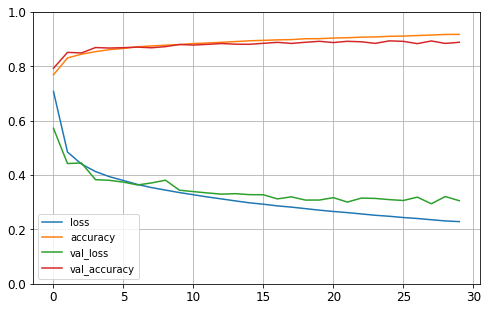

In [37]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [38]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.3428 - accuracy: 0.8770


[0.34275917317867277, 0.877]

In [39]:


X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)



array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.97, 0.  , 0.02, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [40]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [41]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [42]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

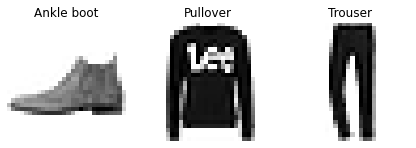

In [43]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


### Exercise

1) Plot Learning curves when using different optimizers 


 ##### Adagrad optimizer

In [44]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adagrad",
              metrics=["accuracy"])

In [45]:
Adagrad = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 121us/sample - loss: 0.2176 - accuracy: 0.9225 - val_loss: 0.2882 - val_accuracy: 0.8994
Epoch 2/30
55000/55000 [==============================] - 6s 111us/sample - loss: 0.2033 - accuracy: 0.9287 - val_loss: 0.2819 - val_accuracy: 0.8994
Epoch 3/30
55000/55000 [==============================] - 7s 120us/sample - loss: 0.1997 - accuracy: 0.9301 - val_loss: 0.2829 - val_accuracy: 0.8996
Epoch 4/30
55000/55000 [==============================] - 6s 113us/sample - loss: 0.1971 - accuracy: 0.9314 - val_loss: 0.2815 - val_accuracy: 0.9010
Epoch 5/30
55000/55000 [==============================] - 7s 127us/sample - loss: 0.1952 - accuracy: 0.9321 - val_loss: 0.2857 - val_accuracy: 0.8992
Epoch 6/30
55000/55000 [==============================] - 6s 118us/sample - loss: 0.1940 - accuracy: 0.9323 - val_loss: 0.2855 - val_accuracy: 0.8988
Epoch 7/30
55000/55000 [===========================

In [46]:
Adagrad.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [48]:
print(Adagrad.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [50]:
Adagrad.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

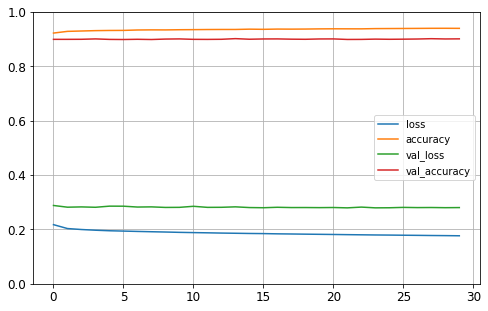

In [52]:
import pandas as pd

pd.DataFrame(Adagrad.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

 ##### RMSprop optimizer

In [74]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])



In [75]:
RMSprop  = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))



Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 9s 160us/sample - loss: 0.4312 - accuracy: 0.8488 - val_loss: 0.3741 - val_accuracy: 0.8748
Epoch 2/30
55000/55000 [==============================] - 9s 167us/sample - loss: 0.3693 - accuracy: 0.8705 - val_loss: 0.3825 - val_accuracy: 0.8726
Epoch 3/30
55000/55000 [==============================] - 9s 155us/sample - loss: 0.3532 - accuracy: 0.8770 - val_loss: 0.4726 - val_accuracy: 0.8684
Epoch 4/30
55000/55000 [==============================] - 8s 151us/sample - loss: 0.3410 - accuracy: 0.8831 - val_loss: 0.4147 - val_accuracy: 0.8716
Epoch 5/30
55000/55000 [==============================] - 9s 160us/sample - loss: 0.3356 - accuracy: 0.8851 - val_loss: 0.3973 - val_accuracy: 0.8790
Epoch 6/30
55000/55000 [==============================] - 8s 154us/sample - loss: 0.3319 - accuracy: 0.8887 - val_loss: 0.4627 - val_accuracy: 0.8662
Epoch 7/30
55000/55000 [===========================

In [76]:
print(RMSprop.epoch)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [77]:
RMSprop.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [78]:
RMSprop.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

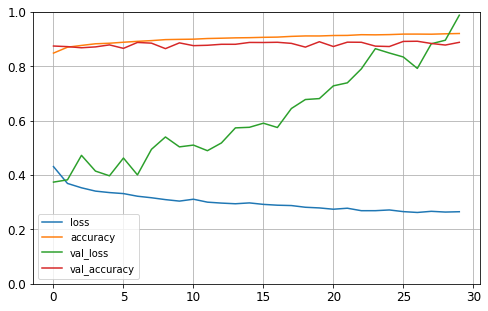

In [79]:
import pandas as pd

pd.DataFrame(RMSprop.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

##### 2) Plot Learning curves when using different batch size 

#### batch size=16 for Adagrad

In [80]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adagrad",
              metrics=["accuracy"])

In [81]:
Adagrad1 = model.fit(X_train, y_train, batch_size=16, epochs=30,
                    validation_data=(X_valid, y_valid))


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 12s 221us/sample - loss: 0.1716 - accuracy: 0.9423 - val_loss: 0.8077 - val_accuracy: 0.9024
Epoch 2/30
55000/55000 [==============================] - 12s 226us/sample - loss: 0.1534 - accuracy: 0.9467 - val_loss: 0.8040 - val_accuracy: 0.9010
Epoch 3/30
55000/55000 [==============================] - 12s 224us/sample - loss: 0.1494 - accuracy: 0.9476 - val_loss: 0.8104 - val_accuracy: 0.9026
Epoch 4/30
55000/55000 [==============================] - 12s 218us/sample - loss: 0.1472 - accuracy: 0.9484 - val_loss: 0.8084 - val_accuracy: 0.9032
Epoch 5/30
55000/55000 [==============================] - 11s 205us/sample - loss: 0.1456 - accuracy: 0.9490 - val_loss: 0.8132 - val_accuracy: 0.9028
Epoch 6/30
55000/55000 [==============================] - 11s 202us/sample - loss: 0.1444 - accuracy: 0.9489 - val_loss: 0.8137 - val_accuracy: 0.9044
Epoch 7/30
55000/55000 [=====================

In [86]:
Adagrad1.params


{'batch_size': 16,
 'epochs': 30,
 'steps': 3438,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [87]:
print(Adagrad1.epoch)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [88]:
Adagrad1.history.keys()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

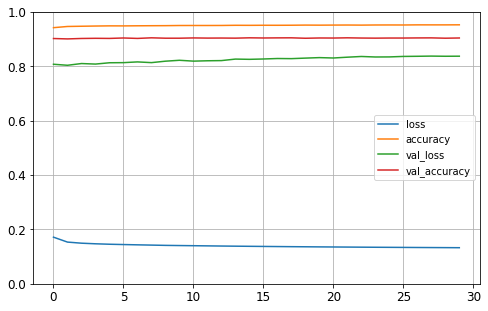

In [89]:
import pandas as pd
pd.DataFrame(Adagrad1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### batch size=16 for RMSprop

In [90]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])


In [91]:
RMSprop1 = model.fit(X_train, y_train, batch_size=16, epochs=30,
                    validation_data=(X_valid, y_valid))



Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 15s 275us/sample - loss: 0.3042 - accuracy: 0.9136 - val_loss: 1.0214 - val_accuracy: 0.8884
Epoch 2/30
55000/55000 [==============================] - 15s 264us/sample - loss: 0.3335 - accuracy: 0.9098 - val_loss: 1.0207 - val_accuracy: 0.8834
Epoch 3/30
55000/55000 [==============================] - 13s 239us/sample - loss: 0.3243 - accuracy: 0.9113 - val_loss: 1.0667 - val_accuracy: 0.8816
Epoch 4/30
55000/55000 [==============================] - 16s 284us/sample - loss: 0.3345 - accuracy: 0.9111 - val_loss: 1.1173 - val_accuracy: 0.8830
Epoch 5/30
55000/55000 [==============================] - 14s 262us/sample - loss: 0.3306 - accuracy: 0.9130 - val_loss: 1.0246 - val_accuracy: 0.8806
Epoch 6/30
55000/55000 [==============================] - 17s 307us/sample - loss: 0.3363 - accuracy: 0.9138 - val_loss: 1.1098 - val_accuracy: 0.8738
Epoch 7/30
55000/55000 [=====================

In [92]:
RMSprop1.params



{'batch_size': 16,
 'epochs': 30,
 'steps': 3438,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [93]:
print(RMSprop1.epoch)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [94]:
RMSprop1.history.keys()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

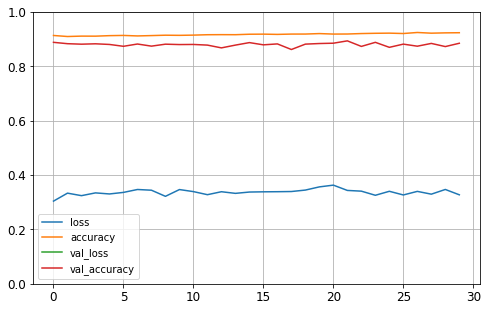

In [95]:
import pandas as pd

pd.DataFrame(RMSprop1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

##### 3) Plot Learning curves when using different number of epochs

#### epochs= 5 for RMSprop

In [96]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adagrad1",
              metrics=["accuracy"])


In [97]:
RMSprop2 = model.fit(X_train, y_train, batch_size=32, epochs=5,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 10s 177us/sample - loss: 0.2812 - accuracy: 0.9295 - val_loss: 1.5552 - val_accuracy: 0.8880
Epoch 2/5
55000/55000 [==============================] - 8s 137us/sample - loss: 0.2759 - accuracy: 0.9313 - val_loss: 1.6754 - val_accuracy: 0.8738
Epoch 3/5
55000/55000 [==============================] - 8s 138us/sample - loss: 0.2560 - accuracy: 0.9344 - val_loss: 1.8503 - val_accuracy: 0.8920
Epoch 4/5
55000/55000 [==============================] - 8s 138us/sample - loss: 0.2666 - accuracy: 0.9320 - val_loss: 2.0669 - val_accuracy: 0.8808
Epoch 5/5
55000/55000 [==============================] - 7s 130us/sample - loss: 0.2520 - accuracy: 0.9347 - val_loss: 2.0037 - val_accuracy: 0.8790


In [98]:
RMSprop2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

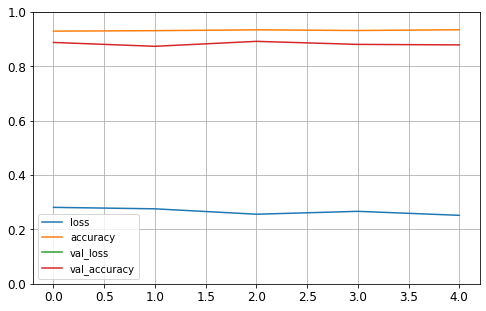

In [99]:
import pandas as pd

pd.DataFrame(RMSprop2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### epochs= 5 for Adagrad

In [100]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adagrad",
              metrics=["accuracy"])

In [101]:
Adagrad2 = model.fit(X_train, y_train, batch_size=32, epochs=5,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 6s 116us/sample - loss: 0.1501 - accuracy: 0.9514 - val_loss: 1.6855 - val_accuracy: 0.8960
Epoch 2/5
55000/55000 [==============================] - 6s 112us/sample - loss: 0.1327 - accuracy: 0.9558 - val_loss: 1.6946 - val_accuracy: 0.8974
Epoch 3/5
55000/55000 [==============================] - 7s 126us/sample - loss: 0.1290 - accuracy: 0.9569 - val_loss: 1.6961 - val_accuracy: 0.8986
Epoch 4/5
55000/55000 [==============================] - 7s 118us/sample - loss: 0.1268 - accuracy: 0.9574 - val_loss: 1.7035 - val_accuracy: 0.8980
Epoch 5/5
55000/55000 [==============================] - 6s 113us/sample - loss: 0.1253 - accuracy: 0.9575 - val_loss: 1.7120 - val_accuracy: 0.8976


In [102]:
Adagrad2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

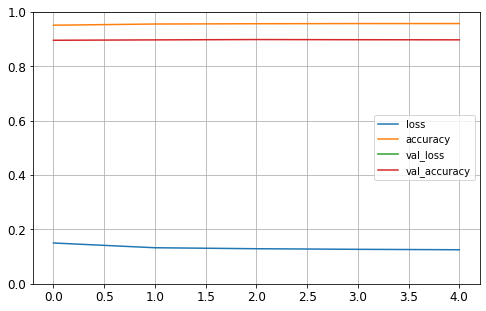

In [103]:
import pandas as pd

pd.DataFrame(Adagrad2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### 4) repeat with more layers

In [106]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(150, activation="relu"))
model.add(keras.layers.Dense(80, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))




In [107]:
model.layers

 ##### Adagrad optimizer

In [111]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adagrad",
              metrics=["accuracy"])

In [112]:
Adagrad = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 117us/sample - loss: 0.6828 - accuracy: 0.7807 - val_loss: 0.5570 - val_accuracy: 0.8166
Epoch 2/30
55000/55000 [==============================] - 5s 93us/sample - loss: 0.5351 - accuracy: 0.8237 - val_loss: 0.5052 - val_accuracy: 0.8328
Epoch 3/30
55000/55000 [==============================] - 5s 93us/sample - loss: 0.5005 - accuracy: 0.8331 - val_loss: 0.4823 - val_accuracy: 0.8362
Epoch 4/30
55000/55000 [==============================] - 5s 97us/sample - loss: 0.4802 - accuracy: 0.8389 - val_loss: 0.4684 - val_accuracy: 0.8404
Epoch 5/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.4667 - accuracy: 0.8429 - val_loss: 0.4565 - val_accuracy: 0.8436
Epoch 6/30
55000/55000 [==============================] - 5s 95us/sample - loss: 0.4561 - accuracy: 0.8451 - val_loss: 0.4462 - val_accuracy: 0.8510
Epoch 7/30
55000/55000 [==============================]

In [113]:
Adagrad.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

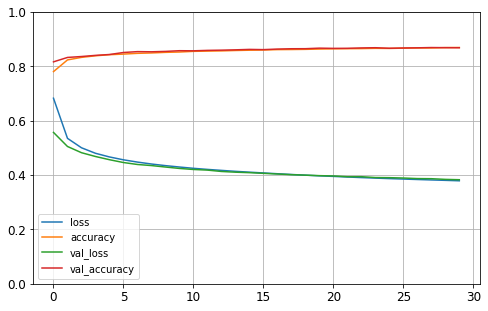

In [114]:
import pandas as pd

pd.DataFrame(Adagrad.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

 ##### RMSprop optimizer

In [115]:
 model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [116]:
RMSprop  = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 114us/sample - loss: 0.4512 - accuracy: 0.8381 - val_loss: 0.3598 - val_accuracy: 0.8680
Epoch 2/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.3735 - accuracy: 0.8670 - val_loss: 0.3887 - val_accuracy: 0.8648
Epoch 3/30
55000/55000 [==============================] - 5s 95us/sample - loss: 0.3503 - accuracy: 0.8767 - val_loss: 0.3594 - val_accuracy: 0.8772
Epoch 4/30
55000/55000 [==============================] - 5s 82us/sample - loss: 0.3388 - accuracy: 0.8802 - val_loss: 0.3440 - val_accuracy: 0.8880
Epoch 5/30
55000/55000 [==============================] - 4s 80us/sample - loss: 0.3312 - accuracy: 0.8842 - val_loss: 0.4164 - val_accuracy: 0.8700
Epoch 6/30
55000/55000 [==============================] - 5s 88us/sample - loss: 0.3279 - accuracy: 0.8865 - val_loss: 0.3895 - val_accuracy: 0.8816
Epoch 7/30
55000/55000 [==============================]

In [117]:
RMSprop.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

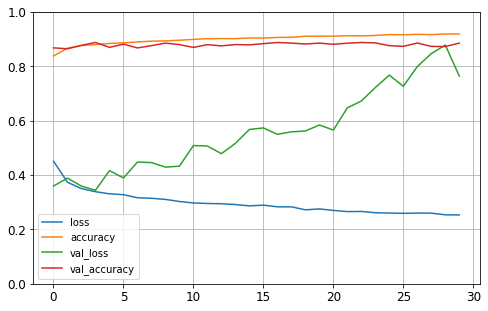

In [118]:
import pandas as pd

pd.DataFrame(RMSprop.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

##### 5) apply on different datasets


In [176]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [185]:
data = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = data.load_data()

In [186]:
X_train_full.shape

(60000, 28, 28)

In [187]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [188]:
X_valid, X_train = X_train_full[:10000] / 255., X_train_full[10000:] / 255.
y_valid, y_train = y_train_full[:10000], y_train_full[10000:]
X_test = X_test / 255.

In [189]:
class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

In [190]:
class_names[y_train[0]]

'3'

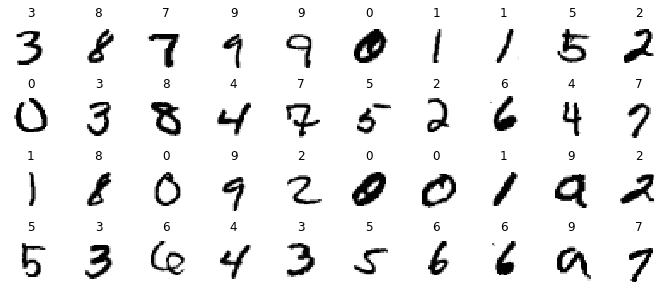

In [191]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

In [193]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [194]:
keras.backend.clear_session()
np.random.seed(42)

In [195]:
model.layers

In [169]:
X_train_full.shape

(50000, 32, 32, 3)

In [197]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [198]:
model.get_layer(hidden1.name) is hidden1

False

In [199]:
weights, biases = hidden1.get_weights()

In [200]:
weights


array([[ 0.05669473,  0.03770317,  0.02363883, ..., -0.10622684,
        -0.11643595,  0.24549827],
       [-0.08116387, -0.09717328, -0.03857635, ...,  0.23564604,
         0.1367379 ,  0.24334341],
       [ 0.15722145,  0.06528223,  0.22789827, ..., -0.04773623,
         0.46953157, -0.41587982],
       ...,
       [ 0.2061795 ,  1.2501947 , -0.02184436, ...,  0.47688252,
        -0.06840722, -0.24458753],
       [ 0.5344785 ,  0.5442382 , -0.09004886, ..., -0.33873802,
         0.07731733,  0.11970799],
       [-0.03512162,  0.0105935 ,  0.03883618, ..., -0.21659426,
         0.15172145, -0.03679824]], dtype=float32)

In [201]:

weights.shape



(784, 300)

In [202]:
biases

array([-0.65544254, -0.891849  , -0.08282401, -0.55234647, -0.32237285,
       -0.4549588 , -0.66143376, -0.4221711 ,  0.10005008, -0.897696  ,
       -0.77831906,  0.05503334,  0.5389577 , -0.708734  , -0.06932378,
       -0.4244732 , -0.22633429, -0.00727828, -1.1991673 , -0.8792592 ,
       -0.4179311 ,  0.02004258, -0.5589584 , -0.6416757 , -0.5777897 ,
       -0.36736187, -0.97471404, -0.16402298, -0.5775213 , -0.56202894,
       -0.37518525, -0.21194555, -1.2258732 , -0.14093742, -0.68471855,
       -0.73132277,  0.4386527 , -0.82044286, -1.2481229 , -0.607975  ,
       -0.6532296 ,  0.12615295, -0.86298734, -0.71288556, -0.1379263 ,
       -0.4623113 , -0.6776042 , -0.8110448 , -0.7020575 , -0.5237091 ,
       -0.15126565,  0.01544679, -1.6709157 , -0.9080805 , -1.3119903 ,
       -0.58725363, -0.7262143 , -1.6402891 , -0.7420476 ,  0.4051013 ,
       -0.63310546, -0.8504723 , -0.6683749 , -0.06940124, -0.849962  ,
        0.17032075, -0.37708563,  0.25928736, -0.4047708 , -0.58

In [208]:
biases.shape



(300,)

In [209]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [205]:

history1 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 108us/sample - loss: 0.0266 - accuracy: 0.9942 - val_loss: 0.0775 - val_accuracy: 0.9757
Epoch 2/30
50000/50000 [==============================] - 5s 102us/sample - loss: 0.0251 - accuracy: 0.9949 - val_loss: 0.0793 - val_accuracy: 0.9768
Epoch 3/30
50000/50000 [==============================] - 5s 109us/sample - loss: 0.0238 - accuracy: 0.9952 - val_loss: 0.0778 - val_accuracy: 0.9770
Epoch 4/30
50000/50000 [==============================] - 5s 109us/sample - loss: 0.0224 - accuracy: 0.9959 - val_loss: 0.0766 - val_accuracy: 0.9768
Epoch 5/30
50000/50000 [==============================] - 5s 99us/sample - loss: 0.0213 - accuracy: 0.9961 - val_loss: 0.0767 - val_accuracy: 0.9775
Epoch 6/30
50000/50000 [==============================] - 5s 97us/sample - loss: 0.0201 - accuracy: 0.9965 - val_loss: 0.0775 - val_accuracy: 0.9772
Epoch 7/30
50000/50000 [============================

In [206]:

history1.params


{'batch_size': 32,
 'epochs': 30,
 'steps': 1563,
 'samples': 50000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

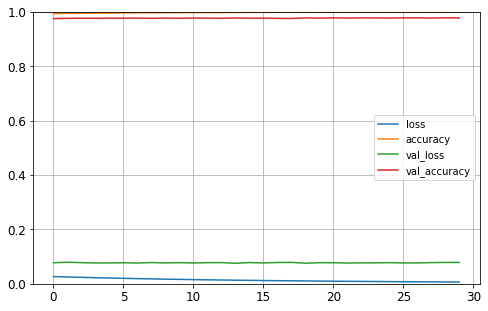

In [207]:


import pandas as pd

pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()